# **Build Linear Regression Model**

### **Read in CSV file**

In [3]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [5]:
encoder = preprocessing.LabelEncoder()
BostonHousing = pd.read_csv("data/converted_train_2020_06_03_16-14-12.csv",parse_dates=['Flight_Date','Request_Date'])
BostonHousing = BostonHousing.drop(columns=['Request_Date', 'Flight_Date', 'flight_unique_id', 'flight_number', 'Currency', 'Price', 'min_future_price',"min_future_price_in_eur"])
BostonHousing['route_abb']=encoder.fit_transform(BostonHousing['route_abb'])
BostonHousing['Request_Weekday']=encoder.fit_transform(BostonHousing['Request_Weekday'])
BostonHousing['Request_AM_PM']=encoder.fit_transform(BostonHousing['Request_AM_PM'])
BostonHousing

,Unnamed: 0,Duration_Time,Departure_hour,route_abb,price_in_eur,Request_Weekday,Request_AM_PM
0,0,56.0,19,3,208.070000,1,0
1,1,44.0,19,3,259.070000,1,1
2,2,32.0,19,3,259.070000,5,0
3,3,58.0,21,2,106.466899,1,0
4,4,46.0,21,2,186.536287,1,1
5,5,34.0,21,2,186.536287,5,0
6,6,59.0,22,3,22.170000,1,0
7,7,47.0,22,3,22.170000,1,1
8,8,35.0,22,3,28.550000,5,0
9,9,55.0,6,3,73.430000,1,1


### **Split dataset to X and Y variables**

In [7]:
Y = BostonHousing.price_in_eur
Y

0        208.070000
1        259.070000
2        259.070000
3        106.466899
4        186.536287
5        186.536287
6         22.170000
7         22.170000
8         28.550000
9         73.430000
10        73.430000
11        61.190000
12       126.910147
13       126.910147
14       126.910147
15       186.536287
16       126.470000
17       126.470000
18       126.470000
19       259.070000
20       259.070000
21       177.470000
22       259.070000
23       106.466899
24       106.466899
25       106.466899
26       106.466899
27       106.466899
28       106.466899
29       106.466899
            ...    
82981     34.260000
82982     34.260000
82983     34.260000
82984     34.260000
82985     34.260000
82986     45.890000
82987     45.890000
82988     36.400000
82989     36.400000
82990     36.400000
82991     36.400000
82992     36.400000
82993     46.830000
82994     54.990000
82995     54.990000
82996     54.990000
82997     54.990000
82998     54.990000
82999     54.990000


In [8]:
X = BostonHousing.drop(['price_in_eur'], axis=1)
X

,Unnamed: 0,Duration_Time,Departure_hour,route_abb,Request_Weekday,Request_AM_PM
0,0,56.0,19,3,1,0
1,1,44.0,19,3,1,1
2,2,32.0,19,3,5,0
3,3,58.0,21,2,1,0
4,4,46.0,21,2,1,1
5,5,34.0,21,2,5,0
6,6,59.0,22,3,1,0
7,7,47.0,22,3,1,1
8,8,35.0,22,3,5,0
9,9,55.0,6,3,1,1


## **Data split**

### **Import library**

In [9]:
from sklearn.model_selection import train_test_split

### **Perform 80/20 Data split**

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### **Data dimension**

In [12]:
X_train.shape, Y_train.shape

((66408, 6), (66408,))

In [13]:
X_test.shape, Y_test.shape

((16603, 6), (16603,))

## **Linear Regression Model**

### **Import library**

In [14]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### **Build linear regression**

#### Defines the regression model

In [15]:
model = linear_model.LinearRegression()

#### Build training model

In [16]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Apply trained model to make prediction (on test set)

In [17]:
Y_pred = model.predict(X_test)

## **Prediction results**

### **Print model performance**

In [18]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [ 3.76886258e-05 -4.44827618e-02  6.93936169e-01  4.92033469e+00
  1.66572070e-02  2.43802390e-01]
Intercept: 84.30575802334961
Mean squared error (MSE): 1612.09
Coefficient of determination (R^2): 0.26


### **String formatting**

By default r2_score returns a floating number ([more details](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html))

In [20]:
r2_score(Y_test, Y_pred)

0.2607590702094389

We will be using the modulo operator to format the numbers by rounding it off.

In [21]:
'%f' % 0.2607590702094389

'0.260759'

We will now round it off to 3 digits

In [22]:
'%.3f' % 0.2607590702094389

'0.261'

We will now round it off to 2 digits

In [24]:
'%.2f' % 0.2607590702094389

'0.26'

## **Scatter plots**

### **Import library**

In [25]:
import seaborn as sns

### **Make scatter plot**

#### The Data

In [26]:
Y_test

8098      39.091031
73274     22.990303
66543     22.990303
66880     79.860000
69814     26.397511
6684      32.953046
26842     48.950000
3447     126.470000
73049     19.733413
52363     55.070000
26926     40.790000
7386      51.951571
13105     24.526887
47274     35.540000
66822     66.090000
37499     73.430000
3564      62.173195
6939     126.910147
41345     14.990000
66993     25.230000
71234    126.470000
72089     15.023449
34169     43.340000
17766     77.138187
17811     19.791870
61212     26.055120
52497     26.920000
42826    109.022305
59404     62.410000
55105     26.055120
            ...    
56266     41.262291
51813     24.526887
74516     16.693649
1546     106.070000
53651     50.990000
43618     19.990000
78444     35.540000
9009     109.498312
8936      89.430859
27765     50.164457
22330     51.951571
5692     149.930000
17156    126.470000
60071     92.810000
25634    112.028665
35607    106.466899
42292     89.430859
322       89.430859
22966    126.910147


In [27]:
import numpy as np
np.array(Y_test)

array([39.091031, 22.990303, 22.990303, ..., 23.65    , 92.437219,
       51.951571])

In [28]:
Y_pred

array([78.63330297, 44.08714399, 71.06681777, ..., 41.30997216,
       62.27859969, 72.54099275])

#### Making the scatter plot

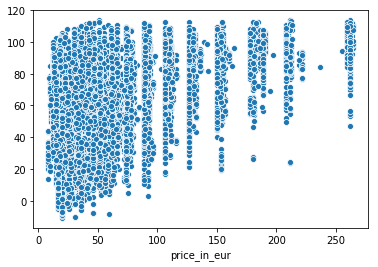

In [29]:
sns.scatterplot(Y_test, Y_pred)

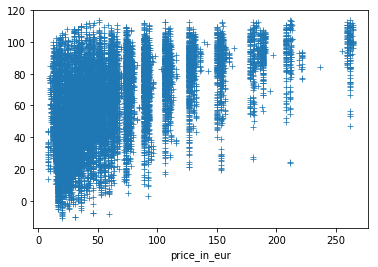

In [30]:
sns.scatterplot(Y_test, Y_pred, marker="+")

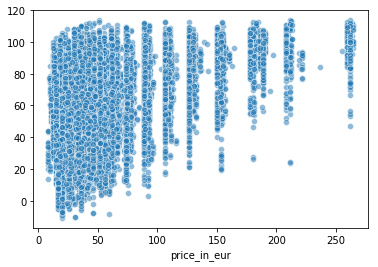

In [31]:
sns.scatterplot(Y_test, Y_pred, alpha=0.5)

# --------------------------------------------------------------------------------------------------------------